Dhananjay Tiwari,
Ph.D. Mechanical Engineering,
Mechanical Engineering Laboratory, 1204
University of Illinois at Urbana Champaign

This file has various implementations done as to learn external optimization algorithms in python.

In [1]:
# import dependencies and libraries
import numpy as np # eh! every computational python code has to have this!
import matplotlib.pyplot as plt # for 2D plots
import mpl_toolkits # for 3D plots
from mpl_toolkits.mplot3d import Axes3D # for 3D plots
from scipy import optimize # optimization module in scipy
from scipy.optimize import minimize # minimize function using various algorithms
from scipy.optimize import Bounds # to define bounds
from scipy.optimize import NonlinearConstraint # to define nonlinear constraints
from scipy.optimize import LinearConstraint # to define linear constraints
from scipy.optimize import SR1 # quasi-Newton Hessian approximation


Implement global optimization

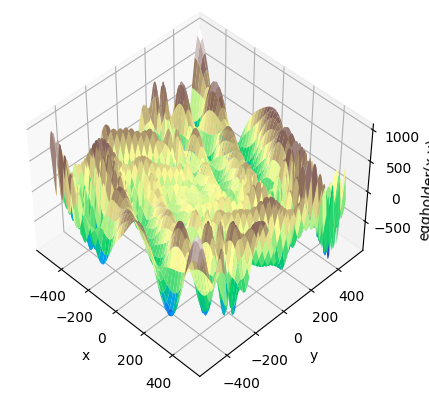

     fun: -227.12310592054814
    funl: array([-227.12310592])
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 2
   nlfev: 27
   nlhev: 0
   nljev: 7
 success: True
       x: array([ 89.7988181, 100.       ])
      xl: array([[ 89.7988181, 100.       ]])


In [2]:
# define the objective function
def eggholder(x):
    return -(x[1] + 47)*np.sin(np.sqrt(abs(x[0]/2 + x[1] + 47))) - x[0]*np.sin(np.sqrt(abs(x[0]-x[1]-47)))
# define the bounds on decision variables
bounds = [(-100, 100),(-100, 100)]

# plot the objective function
x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap = 'terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x,y)')
plt.show()

# apply the global optimizer and obtain the optimal value
results = dict() # store the results in a dictionary
results['shgo'] = optimize.shgo(eggholder, bounds) # solve the problem
print(results['shgo'])

Constrained minimization of multivariate scalar functions (minimize)

Trust-Region Constrained Algorithm (method = 'trust-constr')

In [4]:

# define objective function : Rosenbrock function
def rosen(x): # rosenbrock function
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2 

# def rosen_jac(x): # gradient of rosenbrock function
#     return 0

# def rosen_hess(x): # jacobian of rosenbrock function
#     return 0

# define inequality constraints
def cons_f(x): # constraint function
    return [x[0]**2 + x[1], x[0]**2 - x[1]]

def cons_J(x): # constraint jacobian
    return [[2*x[0], 1], [2*x[0], -1]]

def cons_H(x, v): # constraint hessian
    return v[0]*np.array([[2, 0], [0, 0]]) + v[1]*np.array([[2, 0], [0, 0]])

# define inequality constraints
nonlinear_constraint = NonlinearConstraint(cons_f, [-np.inf, -np.inf], [1, 1])#, jac = cons_J, hess = cons_H)

# define equality constraints
linear_constraint = LinearConstraint([[1,2],[2,1]], [-np.inf, 1],[1,1])

# define bounds
bounds = Bounds([0.0, -0.5], [1.0, 2.0])

# Apply trust region constrained algorithm
x0 = np.array([0.5, 0])

# optimization with approximation of jacobian and hessians
res = minimize(rosen, x0, method = 'trust-constr', jac = "2-point", hess = SR1(), constraints = [linear_constraint, nonlinear_constraint], options={'verbose': 1}, bounds=bounds)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 24, CG iterations: 7, optimality: 4.48e-09, constraint violation: 0.00e+00, execution time: 0.012 s.
